# Proyecto de Análisis de datos NBA por posición

Este proyecto se basa en analizar un archivo .csv que tiene datos sobre jugadores NBA, y hacer una limpieza, un análisis y una visualización de estos datos, creando un nuevo dataset agrupando los datos por las 5 posiciones que existen en este deporte, las cuales son: Base (1), Escolta (2), Alero (3), Ala-Pivot (4) y Pivot (5). Cada posición tiene un número asignado ya que en el lenguaje de basket para no decír siempre Base o Escolta, te podés referír a su número, Éste es un número estandar que se le asignó en su momento para diferenciar las posiciones.

Comienzo el proyecto importando las librerías que voy a utilizar

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Abro el archivo .csv el cual tiene los datos con los cuales voy a trabajar

In [60]:
df=pd.read_csv("Player Totals.csv")

Me fijo las primeras 5 filas para ver que el archivo se haya abierto y ver la composición de los datos

In [61]:
df.head()

,seas_id,season,player_id,player,birth_year,pos,age,experience,lg,tm,...,ft_percent,orb,drb,trb,ast,stl,blk,tov,pf,pts
0,31136,2024,5025,A.J. Green,NaN,SG,24.0,2,NBA,MIL,...,0.895,9.0,55.0,64.0,30,9.0,4.0,12.0,49,252
1,31137,2024,5026,A.J. Lawson,NaN,SG,23.0,2,NBA,DAL,...,0.652,14.0,36.0,50.0,20,10.0,3.0,14.0,22,136
2,31138,2024,5027,AJ Griffin,NaN,SF,20.0,2,NBA,ATL,...,1.000,2.0,16.0,18.0,5,1.0,2.0,8.0,6,48
3,31139,2024,4219,Aaron Gordon,NaN,PF,28.0,10,NBA,DEN,...,0.658,174.0,297.0,471.0,259,56.0,45.0,105.0,142,1013
4,31140,2024,4582,Aaron Holiday,NaN,PG,27.0,6,NBA,HOU,...,0.921,23.0,100.0,123.0,140,42.0,6.0,53.0,125,514


Desde éste punto, voy a comenzar una limpieza de datos para ver que datos faltan, cuales son las columnas que tiene este dataset, eliminando columnas las cuales no me sirven para este análisis y filtrando y creando un nuevo dataset con únicamente los jugadores que hayan jugado o estén jugando en la NBA 

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31870 entries, 0 to 31869
Data columns (total 35 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   seas_id       31870 non-null  int64  
 1   season        31870 non-null  int64  
 2   player_id     31870 non-null  int64  
 3   player        31870 non-null  object 
 4   birth_year    2870 non-null   float64
 5   pos           31870 non-null  object 
 6   age           31848 non-null  float64
 7   experience    31870 non-null  int64  
 8   lg            31870 non-null  object 
 9   tm            31870 non-null  object 
 10  g             31870 non-null  int64  
 11  gs            23233 non-null  float64
 12  mp            30787 non-null  float64
 13  fg            31870 non-null  int64  
 14  fga           31870 non-null  int64  
 15  fg_percent    31713 non-null  float64
 16  x3p           25518 non-null  float64
 17  x3pa          25518 non-null  float64
 18  x3p_percent   21342 non-nu

In [63]:
df.columns

Index(['seas_id', 'season', 'player_id', 'player', 'birth_year', 'pos', 'age',
       'experience', 'lg', 'tm', 'g', 'gs', 'mp', 'fg', 'fga', 'fg_percent',
       'x3p', 'x3pa', 'x3p_percent', 'x2p', 'x2pa', 'x2p_percent',
       'e_fg_percent', 'ft', 'fta', 'ft_percent', 'orb', 'drb', 'trb', 'ast',
       'stl', 'blk', 'tov', 'pf', 'pts'],
      dtype='object')

In [64]:
df.drop(['birth_year','e_fg_percent'], axis=1, inplace=True)

In [65]:
df['lg'].value_counts()

lg
NBA    29650
ABA     1638
BAA      582
Name: count, dtype: int64

In [66]:
df_nba=df[df['lg']=='NBA']

In [67]:
df_nba.shape

(29650, 33)

Luego de esta breve limpieza de datos, veo cuantos valores hay en la columna "pos" que hace referencia a la posición en la que juega el jugador. Como podemos ver, un jugador no solo puede jugar en una posición, sinó que puede jugar en más de una. por lo que a continuación, voy a proceder a reemplazar los valores por alguna de las 5 posiciones(PG=Base, SG=Escolta, SF=Alero, PF=Ala-Pivot, C=Pivot), el sistema que voy a usar es agarrar la primera posición en la que juege el jugador, y si no dice en que posición juega especificamente, lo que voy a hacer es agarrar la primer letra que tenga y agregarlo en la posción que mas sentido tenga. Un ejemplo sería, si el jugador tiene "G-F" voy a agarrar y ponerlo en la posición "SG", ya que el Escolta es el ultimo jugador con la letra "G" y el Alero es el primer jugador con la letra "F".

In [68]:
df_nba['pos'].value_counts()

pos
SG          5987
PF          5970
C           5679
PG          5603
SF          5602
G            135
F            121
G-F           78
F-C           77
F-G           58
SF-SG         45
C-PF          41
PF-SF         38
SG-PG         38
PG-SG         37
PF-C          37
SG-SF         34
C-F           34
SF-PF         27
SG-PF          4
SG-PG-SF       1
PG-SF          1
SF-C           1
C-SF           1
SF-PG          1
Name: count, dtype: int64

In [69]:
df_nba.replace({
    'G':'SG',
    'F':'SF',
    'G-F':'SG',
    'F-C':'PF',
    'F-G':'SF',
    'SF-SG':'SF',
    'C-PF':'C',
    'PF-SF':'PF',
    'SG-PG':'SG',
    'PG-SG':'PG',
    'PF-C':'PF',
    'SG-SF':'SG',
    'C-F':'C',
    'SF-PF':'SF',
    'SG-PF':'SG',
    'SG-PG-SF':'SG',
    'PG-SF':'PG',
    'SF-C':'SF',
    'C-SF':'C',
    'SF-PG':'SF'
}, inplace=True)

C:\Users\mateo\AppData\Local\Temp\ipykernel_6696\2646185816.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nba.replace({


In [70]:
df_nba['pos'].value_counts()

pos
SG    6277
PF    6122
SF    5855
C     5755
PG    5641
Name: count, dtype: int64

Una vez hecho ese reemplazo, voy a hacer otro, pero esta vez cambiando las posiciones en ingles a las posiciones en español

In [71]:
df_nba.replace({
    'PG':'Base',
    'SG':'Escolta',
    'SF':'Alero',
    'PF':'Ala-Pivot',
    'C':'Pivot'
},inplace=True)

C:\Users\mateo\AppData\Local\Temp\ipykernel_6696\3799184317.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nba.replace({


In [72]:
df_nba['pos'].value_counts()

pos
Escolta      6277
Ala-Pivot    6122
Alero        5855
Pivot        5755
Base         5641
Name: count, dtype: int64

In [73]:
df_nba.head()

,seas_id,season,player_id,player,pos,age,experience,lg,tm,g,...,ft_percent,orb,drb,trb,ast,stl,blk,tov,pf,pts
0,31136,2024,5025,A.J. Green,Escolta,24.0,2,NBA,MIL,56,...,0.895,9.0,55.0,64.0,30,9.0,4.0,12.0,49,252
1,31137,2024,5026,A.J. Lawson,Escolta,23.0,2,NBA,DAL,42,...,0.652,14.0,36.0,50.0,20,10.0,3.0,14.0,22,136
2,31138,2024,5027,AJ Griffin,Alero,20.0,2,NBA,ATL,20,...,1.000,2.0,16.0,18.0,5,1.0,2.0,8.0,6,48
3,31139,2024,4219,Aaron Gordon,Ala-Pivot,28.0,10,NBA,DEN,73,...,0.658,174.0,297.0,471.0,259,56.0,45.0,105.0,142,1013
4,31140,2024,4582,Aaron Holiday,Base,27.0,6,NBA,HOU,78,...,0.921,23.0,100.0,123.0,140,42.0,6.0,53.0,125,514


A continuación, creo un nuevo dataset agrupado por las 5 posiciones sumando las métricas básicas, como por ejemplo los puntos, las asistencias, etc. y obteniendo la media de los porcentajes, como por ejemplo el porcentaje de tiro de tres.

In [74]:
df_agrupado_x_posicion=df_nba.groupby('pos').agg({
    'g':'sum',
    'mp':'sum',
    'fg':'sum',
    'fga':'sum',
    'fg_percent':'mean',
    'x3p':'sum',
    'x3pa':'sum',
    'x3p_percent':'mean',
    'ft':'sum',
    'fta':'sum',
    'ft_percent':'mean',
    'orb':'sum',
    'drb':'sum',
    'trb':'sum',
    'ast':'sum',
    'stl':'sum',
    'blk':'sum',
    'tov':'sum',
    'pf':'sum',
    'pts':'sum'
}).reset_index()

In [75]:
df_agrupado_x_posicion.head()

,pos,g,mp,fg,fga,fg_percent,x3p,x3pa,x3p_percent,ft,...,ft_percent,orb,drb,trb,ast,stl,blk,tov,pf,pts
0,Ala-Pivot,301287,6892492.0,1131457,2430705,0.447098,87453.0,253262.0,0.224350,587619,...,0.693854,435153.0,992393.0,1732070.0,443287,170721.0,156659.0,330456.0,736911,2937986
1,Alero,288501,6802387.0,1159496,2571717,0.423768,150005.0,424229.0,0.284582,580418,...,0.733878,274546.0,685504.0,1187790.0,528512,196471.0,93066.0,313699.0,627616,3049415
2,Base,278008,6758542.0,1050083,2410663,0.412436,171746.0,490315.0,0.295712,546480,...,0.770900,130239.0,475711.0,720576.0,1215292,248847.0,39327.0,408879.0,547691,2818392
3,Escolta,302095,7103485.0,1233614,2808394,0.410456,211069.0,586024.0,0.304584,604623,...,0.760113,178027.0,531913.0,848859.0,739456,224062.0,62775.0,343323.0,600600,3282920
4,Pivot,283397,6165912.0,997025,2029100,0.471519,24064.0,73182.0,0.165542,524799,...,0.659464,464194.0,1004688.0,1798263.0,363539,130450.0,246613.0,303643.0,727060,2542913


In [76]:
df_agrupado_x_posicion.shape

(5, 21)

Cambio el nombre de las variables de porcentaje para que no ocupen tanto espacio para luego poder crear un gráfico de correlación y se puedan ver los nombres de las variables de buena forma

In [77]:
df_agrupado_x_posicion.rename(columns={'fg_percent': 'fg%', 'x3p_percent':'3p%','ft_percent':'ft%'}, inplace=True)

In [78]:
df_agrupado_x_posicion.columns

Index(['pos', 'g', 'mp', 'fg', 'fga', 'fg%', 'x3p', 'x3pa', '3p%', 'ft', 'fta',
       'ft%', 'orb', 'drb', 'trb', 'ast', 'stl', 'blk', 'tov', 'pf', 'pts'],
      dtype='object')

In [79]:
df_agrupado_x_posicion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pos     5 non-null      object 
 1   g       5 non-null      int64  
 2   mp      5 non-null      float64
 3   fg      5 non-null      int64  
 4   fga     5 non-null      int64  
 5   fg%     5 non-null      float64
 6   x3p     5 non-null      float64
 7   x3pa    5 non-null      float64
 8   3p%     5 non-null      float64
 9   ft      5 non-null      int64  
 10  fta     5 non-null      int64  
 11  ft%     5 non-null      float64
 12  orb     5 non-null      float64
 13  drb     5 non-null      float64
 14  trb     5 non-null      float64
 15  ast     5 non-null      int64  
 16  stl     5 non-null      float64
 17  blk     5 non-null      float64
 18  tov     5 non-null      float64
 19  pf      5 non-null      int64  
 20  pts     5 non-null      int64  
dtypes: float64(12), int64(8), object(1)
memory 

Luego de ver un poco el nuevo dataset, creo unas métricas avanzadas las cuales son las siguientes:

* %TS: La eficiencia global en la anotación, teniendo en cuenta canastas de campo, tiros de tres puntos y tiros libres. Es una medida completa del rendimiento en anotación. Un TS% alto indica que el jugador convierte sus oportunidades de tiro de manera eficiente, independientemente del tipo de lanzamiento.

* FGe%: La eficiencia en tiros de campo ajustada por el valor extra del tiro de tres puntos (al contabilizar su mayor valor en puntos). Una eFG% alta refleja una mayor calidad en las oportunidades de tiro, especialmente si se aprovechan bien los tiros de tres.

* A/T: La relación entre la cantidad de asistencias y la cantidad de pérdidas de balón (turnovers) de un jugador. Una cifra más alta indica que el jugador es capaz de generar jugadas para sus compañeros sin cometer muchos errores (pérdidas).

In [80]:
df_agrupado_x_posicion['%TS']=df_agrupado_x_posicion['pts']/(2*(df_agrupado_x_posicion['fga']+0.44*df_agrupado_x_posicion['fta']))

df_agrupado_x_posicion['FGe%']=(df_agrupado_x_posicion['fg']+0.5*df_agrupado_x_posicion['x3p'])/df_agrupado_x_posicion['fga']

df_agrupado_x_posicion['A/T']=df_agrupado_x_posicion['ast']/df_agrupado_x_posicion['tov']

In [81]:
df_agrupado_x_posicion.head()

,pos,g,mp,fg,fga,fg%,x3p,x3pa,3p%,ft,...,trb,ast,stl,blk,tov,pf,pts,%TS,FGe%,A/T
0,Ala-Pivot,301287,6892492.0,1131457,2430705,0.447098,87453.0,253262.0,0.224350,587619,...,1732070.0,443287,170721.0,156659.0,330456.0,736911,2937986,0.526975,0.483474,1.341440
1,Alero,288501,6802387.0,1159496,2571717,0.423768,150005.0,424229.0,0.284582,580418,...,1187790.0,528512,196471.0,93066.0,313699.0,627616,3049415,0.524803,0.480029,1.684774
2,Base,278008,6758542.0,1050083,2410663,0.412436,171746.0,490315.0,0.295712,546480,...,720576.0,1215292,248847.0,39327.0,408879.0,547691,2818392,0.519141,0.471221,2.972253
3,Escolta,302095,7103485.0,1233614,2808394,0.410456,211069.0,586024.0,0.304584,604623,...,848859.0,739456,224062.0,62775.0,343323.0,600600,3282920,0.521906,0.476838,2.153820
4,Pivot,283397,6165912.0,997025,2029100,0.471519,24064.0,73182.0,0.165542,524799,...,1798263.0,363539,130450.0,246613.0,303643.0,727060,2542913,0.537964,0.497293,1.197258


Una vez hecha toda la limpieza de datos, todo el análisis y toda la agrupación, procedémos a crear los gráficos para tener una visión más clara de algunas estadísticas. 

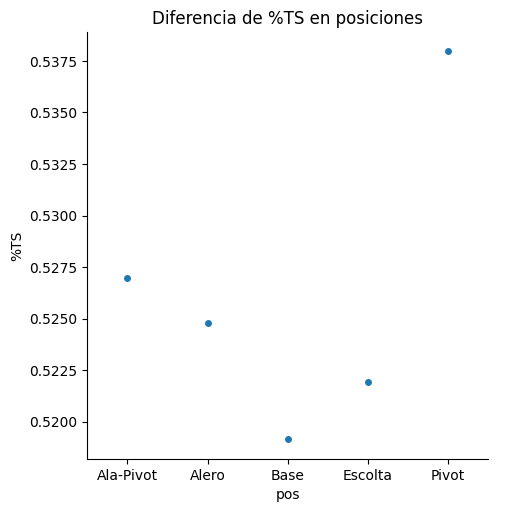

In [82]:
sns.catplot(df_agrupado_x_posicion,x='pos',y='%TS')
plt.title('Diferencia de %TS en posiciones')
plt.show()

Viendo el primer gráfico, podemos deducír que los Pivots son los hombres que más acierto tienen en tiros reales. Esto se debe a que es la posición con las personas más grandes de la cancha en altura, y el juego de los Pivots es estar dentro de la pintura, la pintura es una zona que está debajo del aro, por lo que tienen más ocaciones de anotar canastas fáciles.

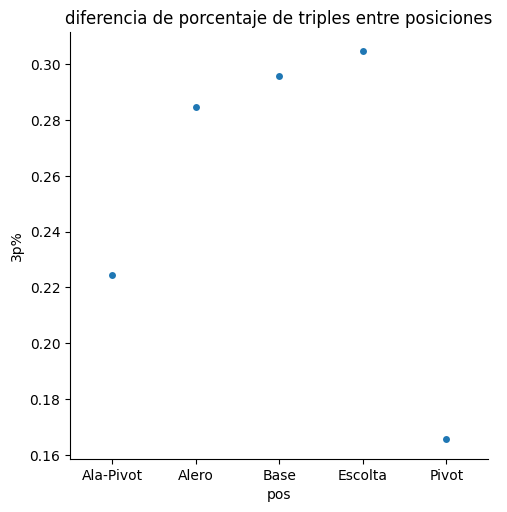

In [83]:
sns.catplot(df_agrupado_x_posicion,x='pos',y='3p%')
plt.title('diferencia de porcentaje de triples entre posiciones')
plt.show()

Al contrario del gráfico anterior, vemos que los Pivots no son los mejores tiradores de larga distancia, esto refleja lo antes dicho, que los jugadores de esta posición juegan en muy corta distancia, es decir, abajo del aro. En cambio, las 3 posiciones que estaban más abajo en el gráfico anterior, vemos que en este gráfico son las que están más arriba, resaltando los Escoltas como los que mejor porcentaje de tiros de tres tienen. Esto se deben a que estas 3 posicones(Base, Escolta y Alero) son posiciones de jugadores bajos y medios en lo que altura respecta y que a estas posiciones se las denomina perimetrales, ya que sus aportaciones comienzan mayormente desde el perímetro(se denomina perímetro a la linea de 3, los jugadores perimetrales juegan por fuera de la linea de 3). Y teniendo esto en cuenta, su mejor arma es el tiro, ya sea de larga distancia, tiro de 3 puntos, o de media distancia, tiro dentro de la linea de 3 puntos y fuera de la pintura.

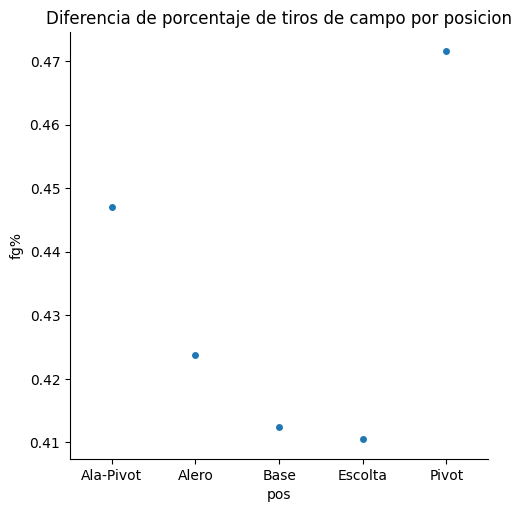

In [84]:
sns.catplot(df_agrupado_x_posicion,x='pos',y='fg%')
plt.title('Diferencia de porcentaje de tiros de campo por posicion')
plt.show()

En este gráfico no podemos sacar muchas conclusiones que no hallamos sacado antes, ya que el FGe% está muy vinculado al TS%, pero si vemos los 2 gráficos obtenemos algo muy interesante. En el gráfico del TS% vemos que los bases son los que menór porcentaje tiene, pero en éste gráfico vemos que la posición que menór porcentaje tiene es la posición del Escolta, esto debe ser ya que en la teoría, el Escolta es la posición que más ataca, o al menos el que más tiros toma.

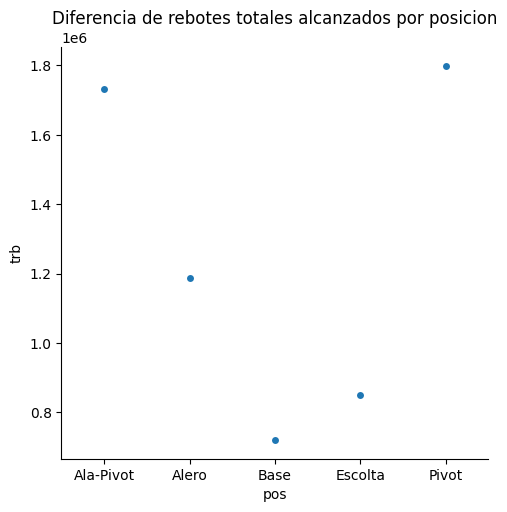

In [85]:
sns.catplot(df_agrupado_x_posicion,x='pos',y='trb')
plt.title('Diferencia de rebotes totales alcanzados por posicion')
plt.show()

En este gráfico podemos sacar la conclusión de que como los Pivots son los jugadores más grandes en cancha y los que más cerca del aro están, es evidente que agarren más rebotes que las demás posiciones. también, para sumar a esta conclusión agrego que una de las funciones principales de esta posición es agarrar rebotes, por lo ya antes mencionado, jugador más alto del equipo y juego más enfocado a estár cerca del aro. 

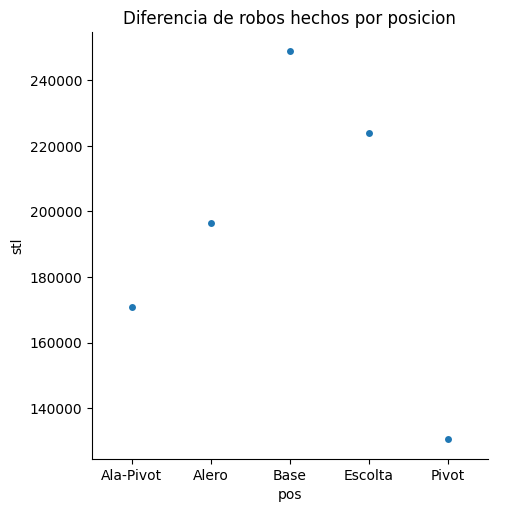

In [86]:
sns.catplot(df_agrupado_x_posicion,x='pos',y='stl')
plt.title('Diferencia de robos hechos por posicion')
plt.show()

Podemos ver que en este gráfico los bases roban más pelotas que las demás posiciones, y luego le siguen las otras 2 posiciones de perimetrales, esto se debe a que como estas 3 posiciones son de perimetrales, es decir, están mas lejos del aro, pican mas la pelota y también defienden el perímetro, por lo que el robo de la pelota se les hace una buena opción para cortar los ataques de los demás equipos. La conclusión que se puede sacár de este gráfico y lo antes dicho, es que como los Bases son los que transportan la pelota de un lado al otro de la cancha, es decir, pican más la pelota que las demás posiciones, y además se encargan de la organización del ataque, son más propensos a que sufran algún robo de pelota

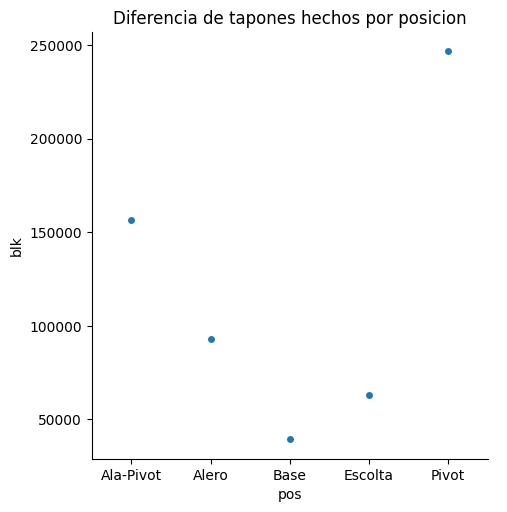

In [87]:
sns.catplot(df_agrupado_x_posicion,x='pos',y='blk')
plt.title('Diferencia de tapones hechos por posicion')
plt.show()

Para ponernos en contexto, los tapones o bloqueos, son tiros de campo que fueron bloqueados por el defensor, y, por lo que se puede observar, los Pivots son los que mayor número de tapones hacen, esto se debe a que custódian la pintura. Como su juego se basa en estar siempre cerca del aro, ya sea del contrincante para atacar o el propio para defenser, son propensos a destacar en esta estadística

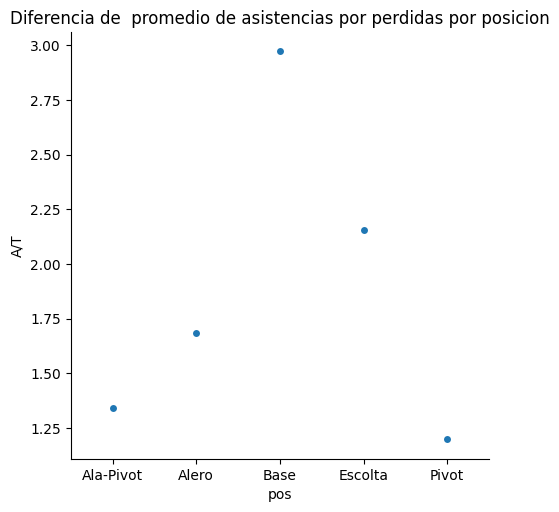

In [88]:
sns.catplot(df_agrupado_x_posicion,x='pos',y='A/T')
plt.title('Diferencia de  promedio de asistencias por perdidas por posicion')
plt.show()

En este gráfico de la métrica avanzada A/T podemos deducír lo siguiente, como los bases son los que mas asistencias por perdidas promedian, esto se basaría en que como son los organizadores del ataque, y es la posición donde los jugadores con mejor visión del equipo están, podemos decír que es por justamente su rol en el equipo que resaltan en esta estadística 

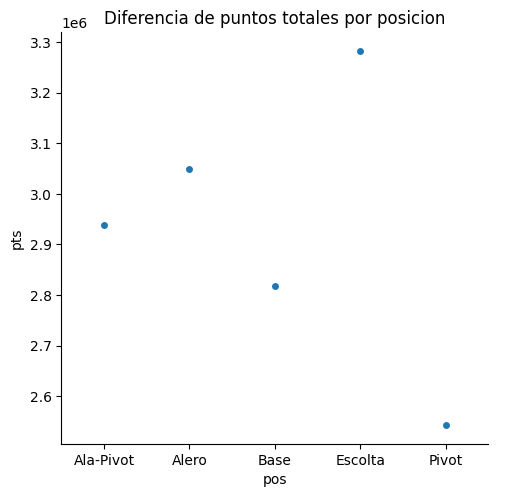

In [89]:
sns.catplot(df_agrupado_x_posicion,x='pos',y='pts')
plt.title('Diferencia de puntos totales por posicion')
plt.show()

Una de las métricas mas importantes, ya que tiene relación directa con las victórias de un equipo son los puntos, y por lo vísto en este gráfico los Escoltas son los que mayor relevancia tienen. La conclusión que yo saco es que al ser los jugadores que más volúmen de tiro tienen, son los que más oportunidades tienen para meter puntos. además, el ser perimetral les dá la ventaja con respecto a los Pivots y a los Ala-Pivots de tener el recurso del tiro de 3 puntos, por lo que esto también es un factór que ayuda a la hora de meter más puntos. Hablando de una estadística que no hablamos y también afecta a esta métrica, son los tiros libres intentados, por lo que podemos llegar a concluír que al atacar al aro pueden sacar tiros libres y aumentár su anotación de puntos

In [90]:
df_numerico=df_agrupado_x_posicion.select_dtypes('number')
matrix_corr=df_numerico.corr()

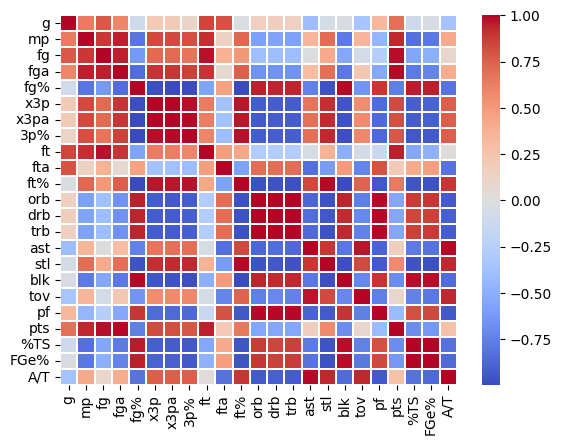

In [91]:
sns.heatmap(matrix_corr, cmap='coolwarm', fmt=".2f", linewidths=0.1)
plt.show()

En este Gráfico de correlación, podemos ver varias relaciones entre diferentes variables, pero vamos a análizar una relación muy básica, y que es la relación entre minutos y puntos

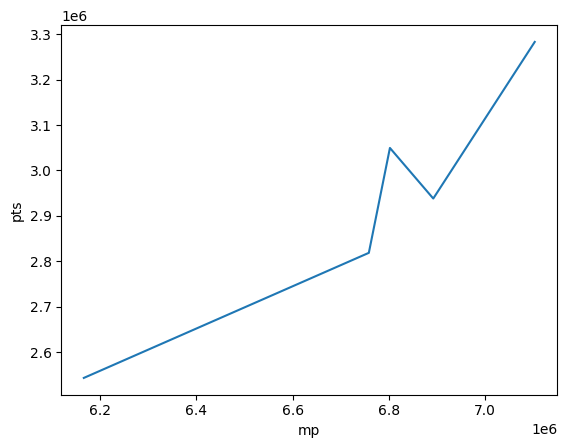

In [92]:
sns.lineplot(df_agrupado_x_posicion,x='mp',y='pts')
plt.show()

Por lo que podemos ver, hay una relación entré puntos y minutos, por lo que podemos decír solamente viendo el gráfico es que mientras más minutos juegue un jugador, más puntos puede ocasionár. lo más interesante viene cuando vemos que no es constante, sinó que llegando a los 6.8 Millones de minutos, se dá un salto de puntos muy bueno, pero luego pasado esos minutos los puntos bajan y luego sigue en una linea exponencial

In [93]:
df_agrupado_x_posicion.to_csv('estadisticas_por_posiciones.csv', index=False)

Terminamos el análisis exportando el dataframe y convirtiendolo en un archivo .csv

## Conclusión

La conclusión final que podemos sacar con este análisis es que en la NBA, los Pivots han sido muy importantes en el juego, tanto en ataque, tomando buenos tiros de campo, como en defensa, haciendo tapones y agarrando rebotes. en mi opinión, el Pivot es una pieza fundamental en el juego de un equipo, al igual que el Base, ya que también como vímos en los gráficos, el Base se destaca en dar asistencias, organizar el juego y en los robos a los demás jugadores contrarios. Si bien en este análisis hablamos mucho sobre estas 2 posiciones, quiero hablar también sobre los Escoltas, que como dicen los gráficos es una posición que también viene siendo importante, ya que te aporta una salída con los recursos que pueda tener desde el perímetro, tiro de larga distáncia(tiro de 3 puntos), tiro de media distáncia(tiro de 2 puntos), bandejas en carrera, y puntos de tiros libres. Pero, estos gráficos también dicen algo muy interesante y peculiar, que hasta el momento no había comentado, y eso es la importancia que tienen los Aleros en el juego. Si bien los jugadores de ésta posición no destacan en nada viendo los gráficos, son los jugadores que más aportan al equipo en todos los ámbitos del juego, ya que si vemos los gráficos, el Alero siempre está en el medio de todas las estadísticas visualizadas por posiciónes.Esto quiere decir, que el Alero tiene que ser un jugador versátil, el cual pueda defender todas las posiciones, o al menos la grán mayoría, y que en ataque pueda tirar de larga distáncia si es que se requiere la ocación, jugar cerca del aro, o a media distancia del aro.